## India: Covid19 Effect on Air Pollution

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the City Day Data
city_day_df = pd.read_csv('../Data/city_day.csv')
city_day_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
# View basic information
city_day_df.shape

(29531, 16)

In [4]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### 1. Data Preparation and Feature Engineering

In [5]:
print(f"The Data is from {city_day_df['Date'].min()} to {city_day_df['Date'].max()}")

The Data is from 2015-01-01 to 2020-07-01


In [6]:
# The dataset has a lot of missing values. Let's ceate a data frame to show these and their percentage to total
def no_values_dframe(df):
    
    # Get all missing values from the dataset
    no_values = df.isnull().sum()
    
    # Calculate percentage of missing to total
    no_values_percent = np.round((no_values / len(df) * 100), 2)
    
    # Create a dataframe for the above results
    no_values_df = pd.concat([no_values, no_values_percent], axis = 1)
    
    # Rename the Data Frame columns (by default the coulmns are '0', '1'...)
    no_values_df = no_values_df.rename(
        columns = {0: 'Missing Values', 1: '% of Total'})
    
    # Sort the values (descending - % total) and remove the rows that have '0' missing values
    no_values_df = no_values_df[no_values_df.iloc[:,-1] != 0].sort_values('% of Total', ascending=False)
    
    # Return the Data Frame
    return no_values_df

In [7]:
city_no_values = no_values_dframe(city_day_df)
city_no_values.style.background_gradient(cmap='GnBu')

,Missing Values,% of Total
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
AQI_Bucket,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


In [8]:
#TO-DO: Add section for imputing missing values (optional)

In [9]:
# Cities in the dataset
cities = city_day_df['City'].value_counts()
print(f'There are {len(cities)} cities in the dataset')
cities

There are 26 cities in the dataset


Ahmedabad             2009
Delhi                 2009
Lucknow               2009
Chennai               2009
Bengaluru             2009
Mumbai                2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Kochi                  162
Ernakulam              162
Aizawl                 113
Name: City, dtype: int64

In [10]:
# Convert the Date column to datetime format
city_day_df['Date'] = pd.to_datetime(city_day_df['Date'])
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [11]:
# Extract the year, month from Date and store them in new columns
city_day_df['Year'] = pd.DatetimeIndex(city_day_df['Date']).year
city_day_df['Month'] = pd.DatetimeIndex(city_day_df['Date']).month
city_day_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,1
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,1
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,1
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,1


In [12]:
# Combine Benzene, Toluene and Xylene into one column
city_day_df['BTX'] = city_day_df['Benzene'] + city_day_df['Toluene'] + city_day_df['Xylene']

# Drop the columns that are not required
city_day_df.drop(['Benzene', 'Toluene', 'Xylene'], axis = 1);

In [13]:
# Create a new list 'pollutants'
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'BTX']

In [14]:
# Set Date as the index for the data frame
city_day_df.set_index('Date', inplace=True)

### 2. Data Visualization

#### 2.1 Visualize Yearly Pollutants Data

In [15]:
# Create a function to show pollutant-wise yearly plot
def show_year_plot(df, value, c):
    ax = df[value].plot(marker='.', c=c, linestyle='None', figsize=(15,5), alpha=0.3, legend=True)
    ax.set_xlabel('Year')
    ax.set_ylabel('ug / m3')

In [16]:
# Create a copy of the main data frame
df = city_day_df.copy()

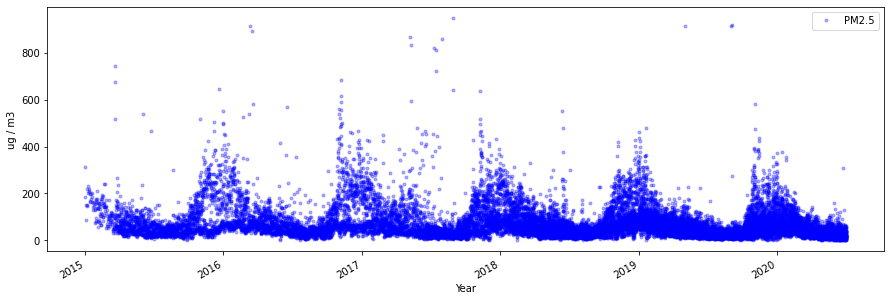

In [17]:
# Show plot for PM2.5
show_year_plot(df, 'PM2.5', 'b')

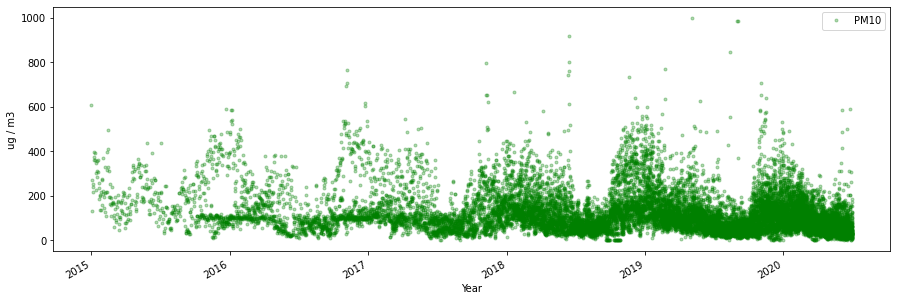

In [18]:
# Show plot for PM10
show_year_plot(df, 'PM10', 'g')

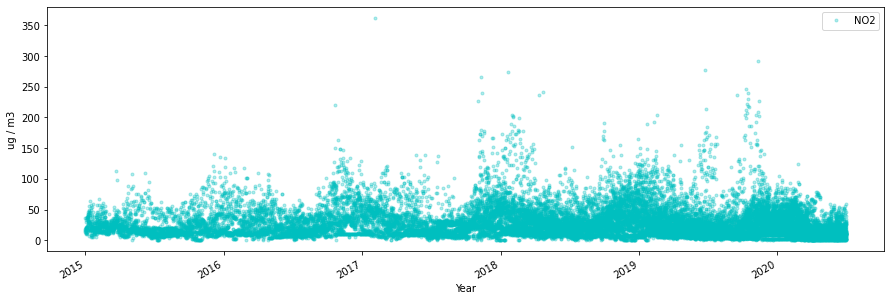

In [19]:
# Show plot for NO2
show_year_plot(df, 'NO2', 'c')

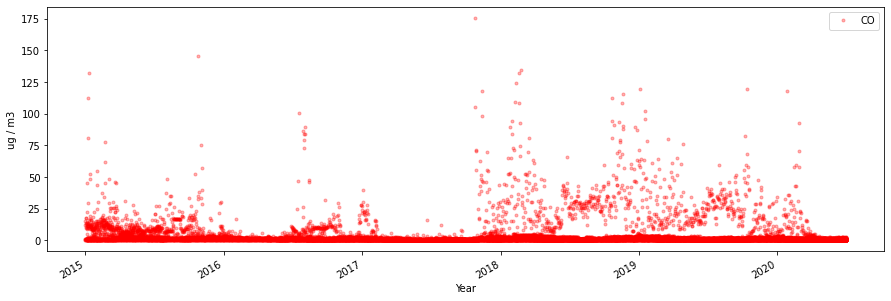

In [20]:
# Show plot for CO
show_year_plot(df, 'CO', 'r')

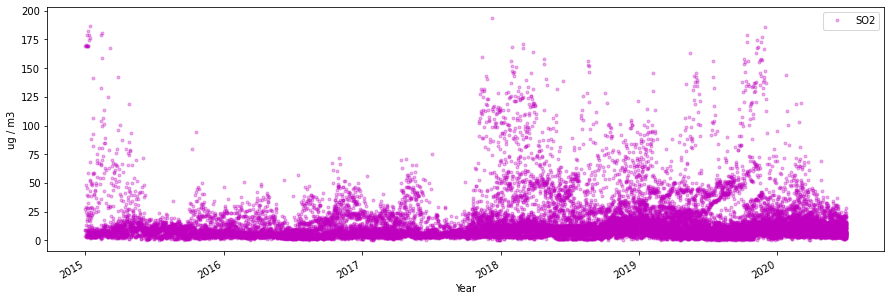

In [21]:
# Show plot for SO2
show_year_plot(df, 'SO2', 'm')

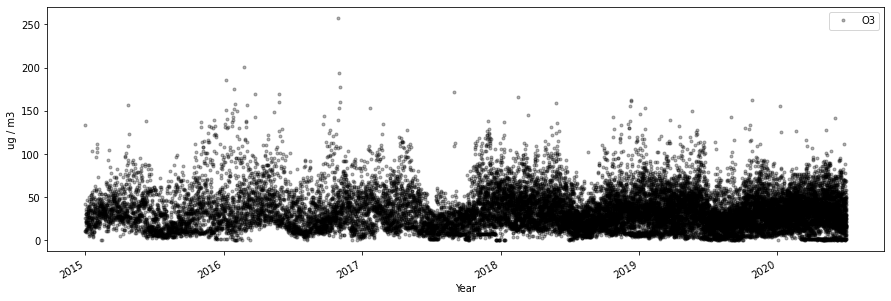

In [22]:
# Show plot for O3
show_year_plot(df, 'O3', 'k')

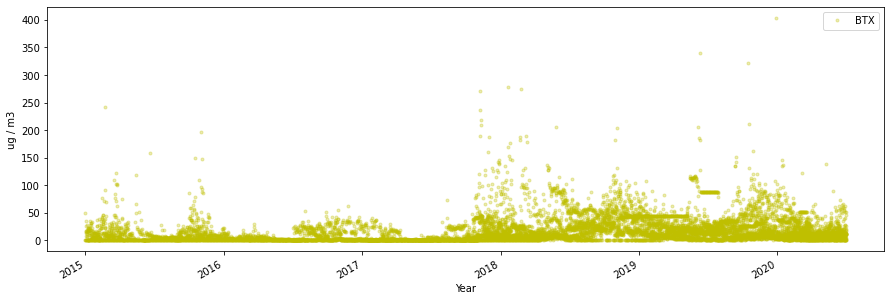

In [23]:
# Show plot for BTX
show_year_plot(df, 'BTX', 'y')

#### 2.2 Visualize Monthly (Seasonal) and Yearly (Trends) Distribution

In [24]:
# Define a function to show the plots
def show_trend_plot(value):
    sns.set_style('darkgrid')
    fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi=80)
    
    sns.boxplot(x='Year', y=value, data=city_day_df, ax=axes[0])
    sns.pointplot(x='Month', y=value, data=city_day_df, ax=axes[1])

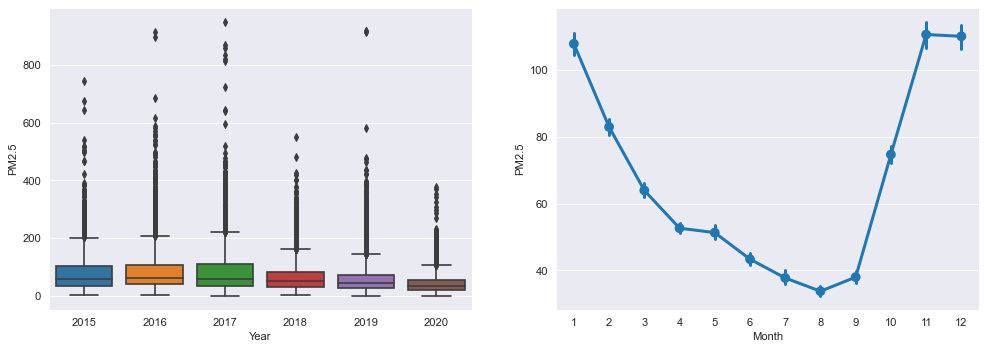

In [25]:
# Show plot for PM2.5
show_trend_plot('PM2.5')

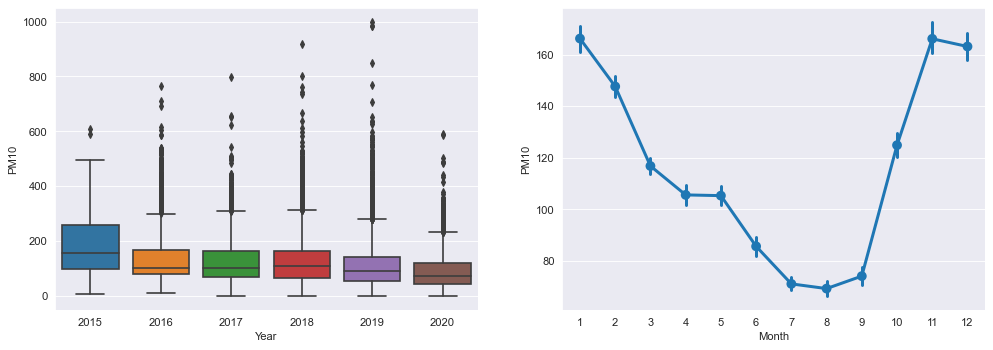

In [26]:
# Show plot for PM10
show_trend_plot('PM10')

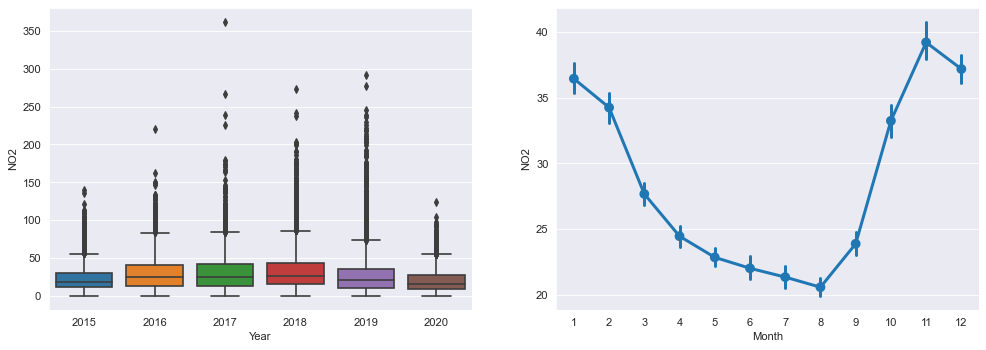

In [27]:
# Show plot for NO2
show_trend_plot('NO2')

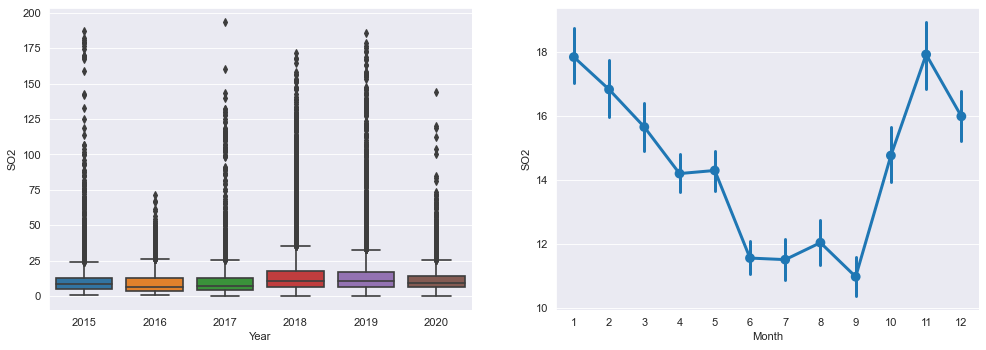

In [28]:
# Show plot for SO2
show_trend_plot('SO2')

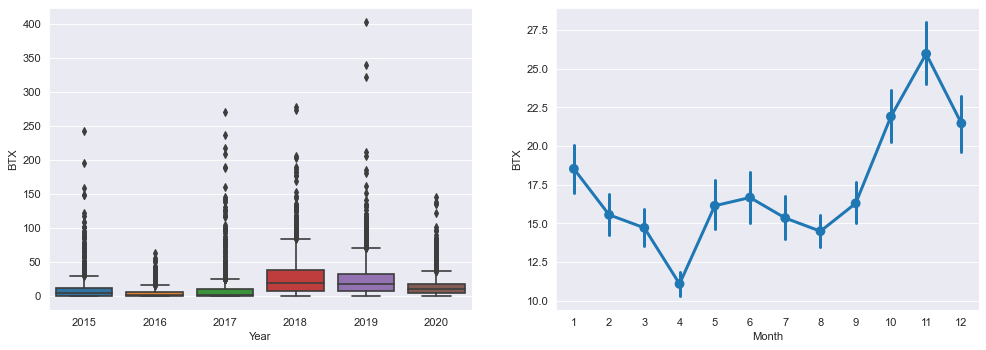

In [29]:
# Show plot for BTX
show_trend_plot('BTX')